<a href="https://colab.research.google.com/github/alphadev3296/deep-learning-practice/blob/main/Chapter-04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

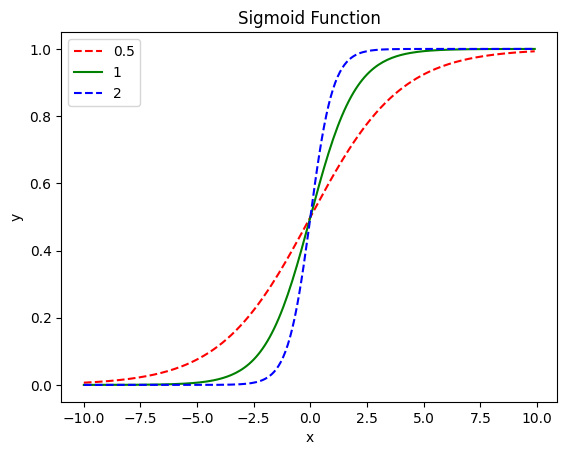

In [7]:
# Sigmoid Function - 1

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-10,10,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1, "r", linestyle="--")
plt.plot(x,y2, "g")
plt.plot(x,y3, "b", linestyle="--")
plt.legend(["0.5", "1", "2"])
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

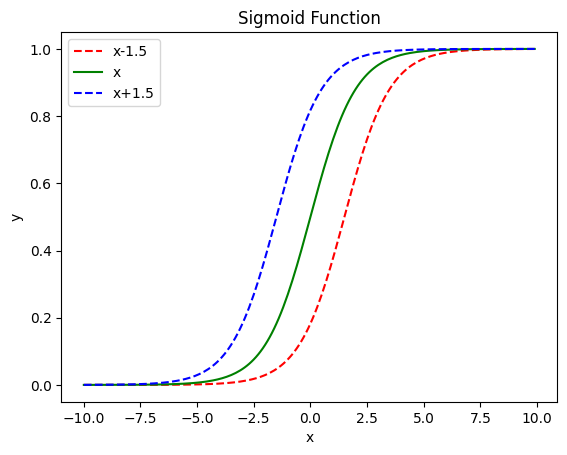

In [9]:
# Sigmoid Function - 2

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-10,10,0.1)
y1 = sigmoid(x-1.5)
y2 = sigmoid(x)
y3 = sigmoid(x+1.5)
plt.plot(x,y1, "r", linestyle="--")
plt.plot(x,y2, "g")
plt.plot(x,y3, "b", linestyle="--")
plt.legend(["x-1.5", "x", "x+1.5"])
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
# Logistic Regression

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

w = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([w,b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  hypothesis = torch.sigmoid(x_train.matmul(w)+b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

print(w, b)
y_pred = torch.sigmoid(x_train.matmul(w)+b)
y_pred = y_pred >= torch.FloatTensor([0.5])
print(y_pred)

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852
tensor([[3.2530],
        [1.5179]], requires_grad=True) tensor([-14.4819], requires_grad=True)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [14]:
# Logistic Regression with Module

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy*100))

print(list(model.parameters()))
y_pred = model(x_train)
print(y_pred)
y_pred = y_pred >= torch.FloatTensor([0.5])
print(y_pred)


Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [16]:
# Logistic Regression with Class

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

class BinaryClassfier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = BinaryClassfier()
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy*100))

print(list(model.parameters()))
y_pred = model(x_train)
print(y_pred)
y_pred = y_pred >= torch.FloatTensor([0.5])
print(y_pred)

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00